In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("Country-data.csv")

In [3]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


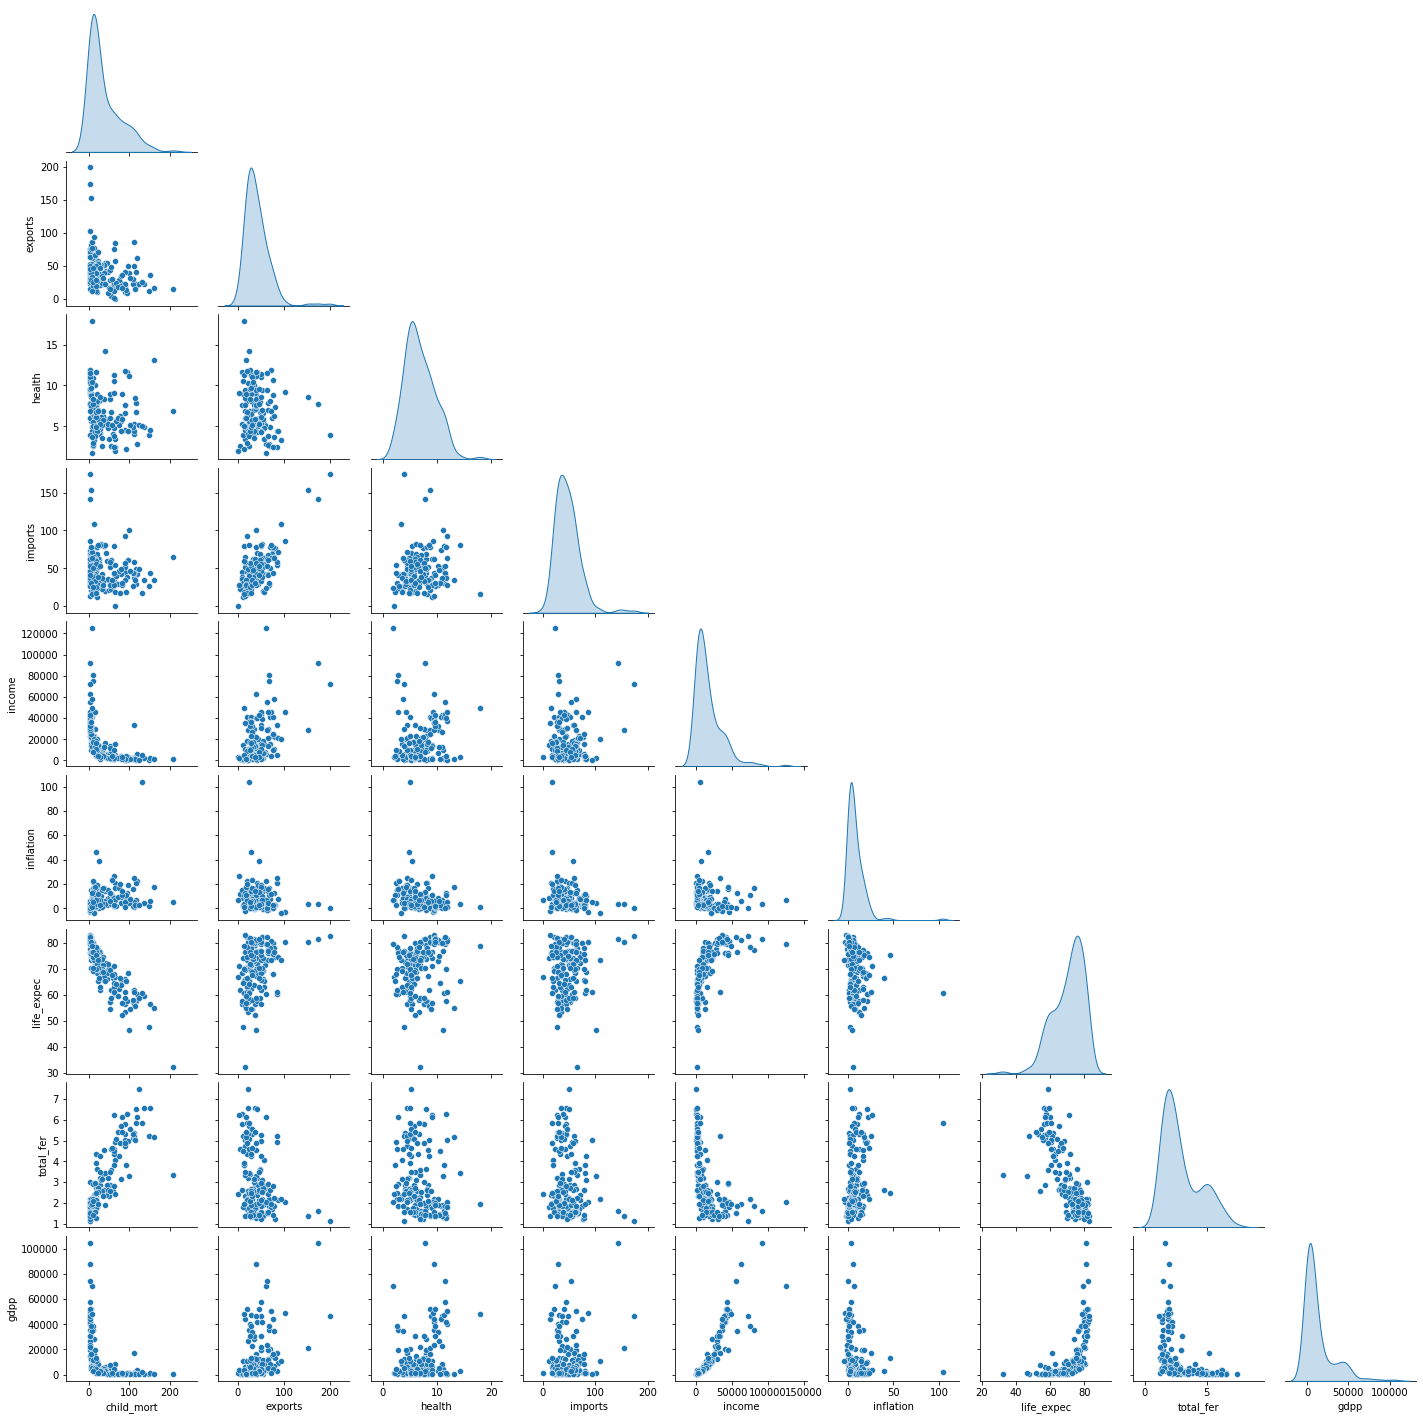

In [5]:
g = sns.pairplot(data=data, diag_kind = 'kde', corner = True)
g.fig.set_size_inches(20,20)
# coeficient of correlation shows how strong dependencies are between our data

<AxesSubplot:>

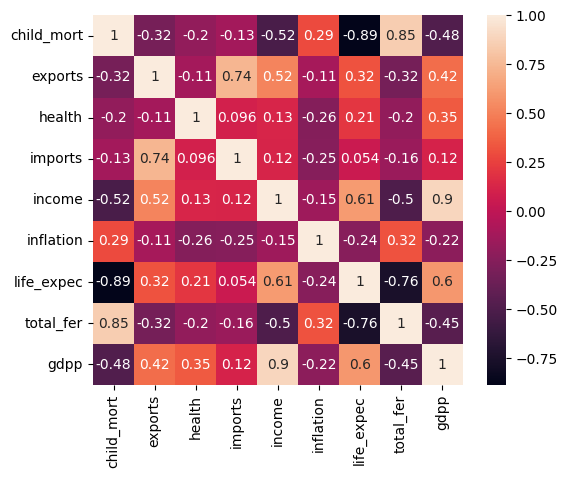

In [6]:
sns.heatmap(data.corr(), square=True, annot=True)
# (Pearce correlation)

# correlation is a linear coeficient of dependency one variable to another
# if gdpp becomes bigger  --> child mort will become bigger also
# negative correlation (definition) - if one metrics increases --> the other one becomes LESS
# positive correlation (definition) - if one metrics increases --> the other one INCREASES also

In [7]:
# Clusterization - is whem a lot of dots merging into the CLOSEST one!!!   

/home/hacking/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdpp'>

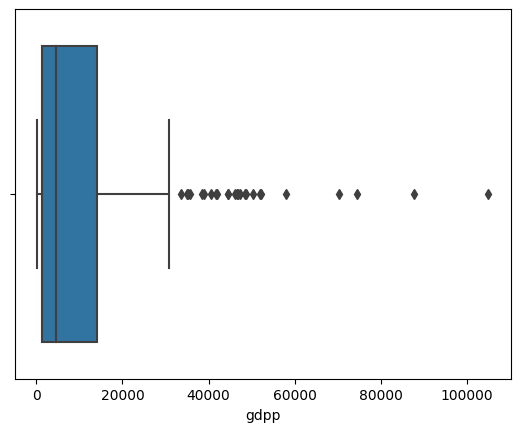

In [8]:
sns.boxplot(data['gdpp']) 
# In boxplot --> is everything normal before the central line 
# In the range from the left border to the right is 99% of data everything else are oughts(discharges)  

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [10]:
scaler = StandardScaler()

In [11]:
copy_data = data.copy()
copy_data = copy_data.drop(columns = ['country'])

In [12]:
scalered_data = pd.DataFrame(scaler.fit_transform(copy_data), columns=copy_data.columns)
# scaling data in order to standardatize the data we need that beause values are very differ in 
# the number ranges and this move improves the precising of the model 
# we do this because in the model algorithm it used the distance between values and in case 
# the distance gets bigger the precision becomes worse

In [13]:
#scalered_data['country'] = column_country

#labelencoder = LabelEncoder() 
#scalered_data['country'] = labelencoder.fit_transform(scalered_data['country'])

# I removed this, because the model thought encoded numbers were a separate parametr for them!! OMG I AM SMART!!

In [14]:
scalered_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


Before standartazation 


<AxesSubplot:>

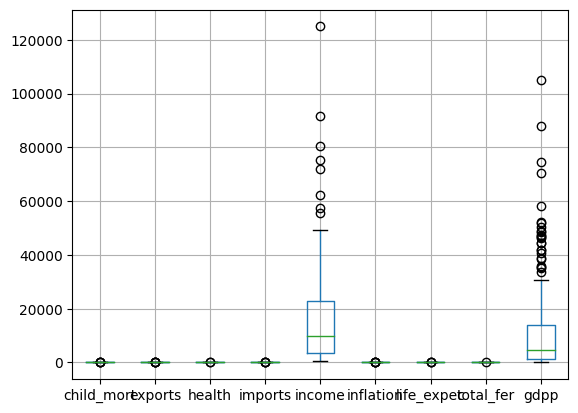

In [15]:
print("Before standartazation ")
data.boxplot()

After standartazation 


<AxesSubplot:>

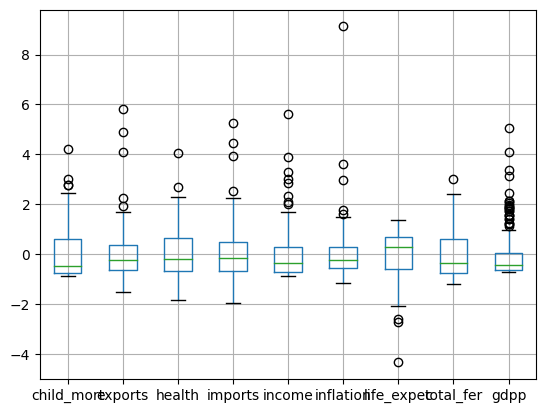

In [16]:
print("After standartazation ")
scalered_data.boxplot()

Pairpot of the scalered data


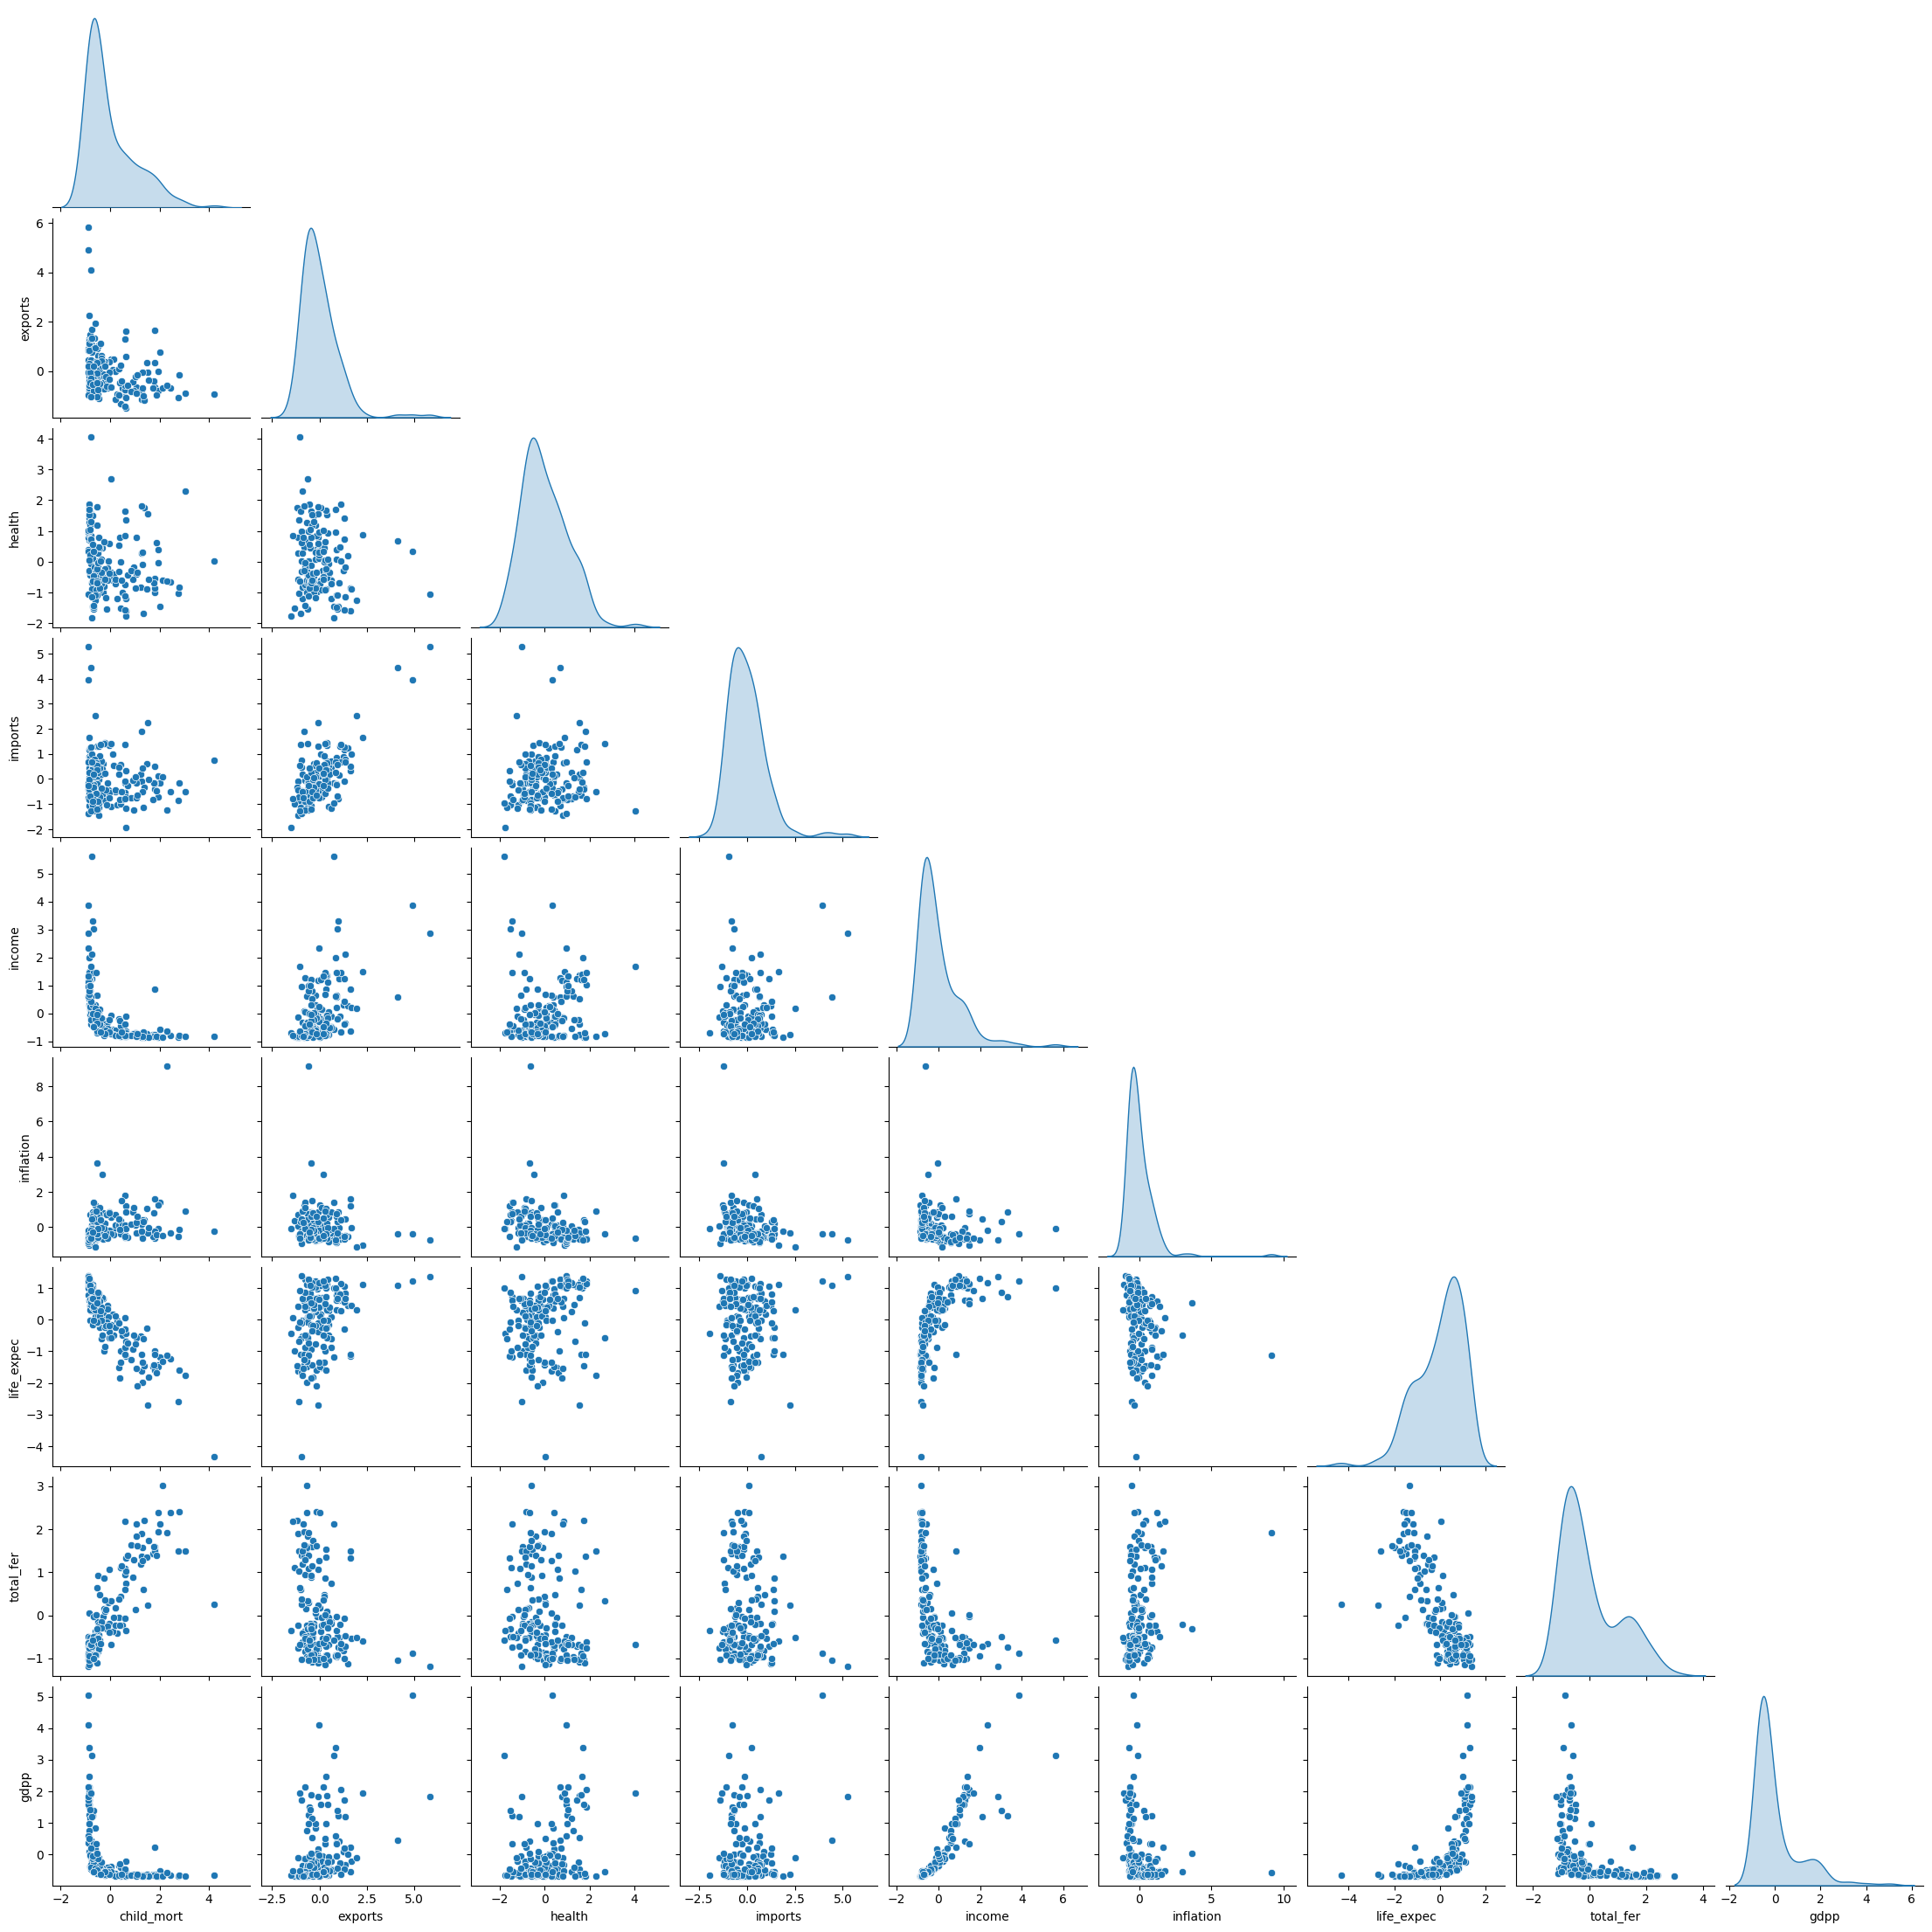

In [17]:
# After standartazion the distribution of the data hasn't changed we just changed the range of numbers here
print("Pairpot of the scalered data") 
g = sns.pairplot(data=scalered_data, diag_kind = 'kde', corner = True)

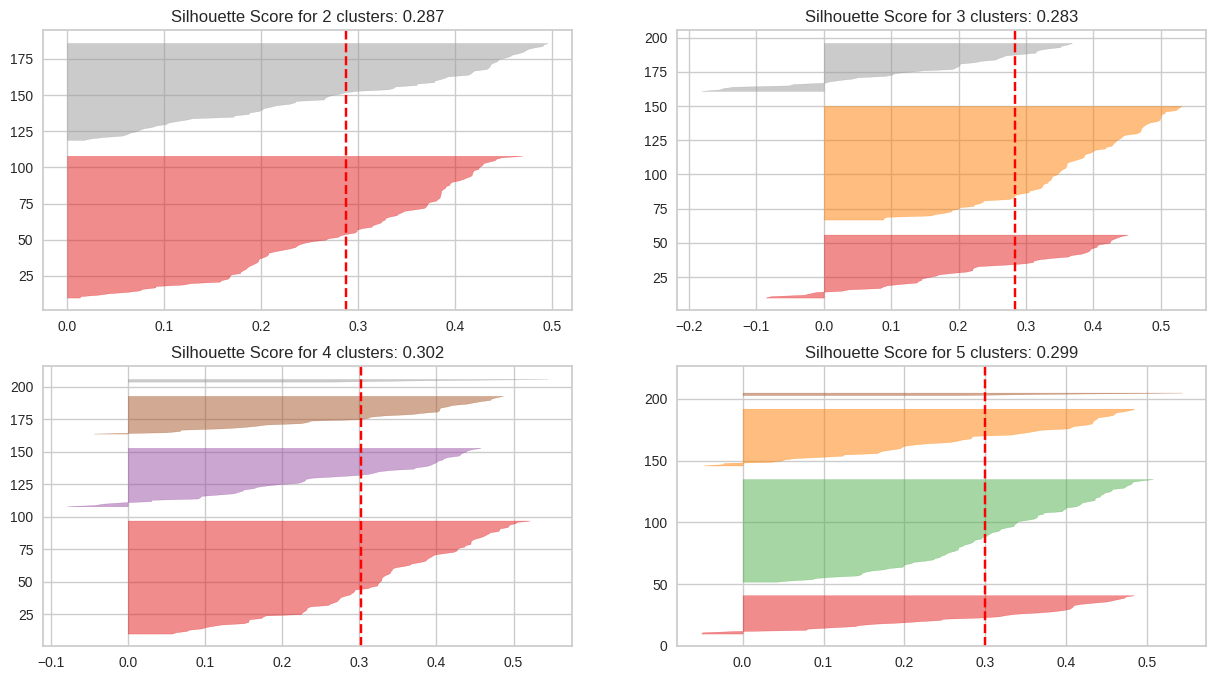

In [18]:
# Silhouette Scores of PCA Data
# Кластер - условное скопление данных (обьединение однороных элементов)

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(scalered_data)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(scalered_data, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)
#   silViz.poof()

# On the graphs below we can see the metric "silhouette_score" and the best score we can see exactly with 4 clusters!!
# so that during the model fitting we need to use 4 clusters  

In [19]:
model = KMeans(n_clusters=4) # creating the model and defining the amount of clusters

In [20]:
model.fit(scalered_data)   # fitting the model

KMeans(n_clusters=4)

In [21]:
predictions = model.predict(scalered_data)  # we got the array with predicted data (which string is related to cluster) 
data['predictions'] = predictions # adding data to the table

In [22]:
scalered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [23]:
scalered_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [24]:
data['predictions']

0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: predictions, Length: 167, dtype: int32

In [25]:
data.predictions.value_counts()

0    87
1    45
2    32
3     3
Name: predictions, dtype: int64

In [26]:
data.loc[data.predictions == 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,predictions
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [27]:
#data.groupby(['predictions'])['country'].head()
data['predictions'].value_counts()

0    87
1    45
2    32
3     3
Name: predictions, dtype: int64

In [28]:
data[data['predictions']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,predictions
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3
